In [54]:
# mlp for regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt

In [55]:
# load the dataset
df = pd.read_csv("Normalized Memory Aggregated 2018 Compiled Weather Data.csv", index_col=0)

In [56]:
df.dropna(inplace=True)

In [57]:
df.tail()
column_mean = []
column_std = []

#df_normalized = df.copy()

# apply normalization techniques
#for column in df_normalized.columns:
#    if column != 'Percent Output':
#        column_mean.append(df_normalized[column].mean())
#        column_std.append(df_normalized[column].std())

#        if df_normalized[column].std() == 0:
#            df_normalized.loc[:,column] = 0
#        else:
#            df_normalized[column] = (df_normalized[column] - df_normalized[column].mean()) / df_normalized[column].std()

# view normalized data


In [58]:
"""
# split into past, current, and future data
pastWeatherAndSupply = df.iloc[:-2].drop(['year', 'day'], axis=1)

currentWeather = df.iloc[-2]
currentWeather = currentWeather.drop(['Percent Output', 'year', 'day']) #dropping supply column for testing
currentWeather = currentWeather.values[:].reshape((1,len(df.iloc[-2])-3))

nextHourWeather = df.iloc[-1]
nextHourWeather = nextHourWeather.drop(['Percent Output', 'year', 'day']) #dropping supply column for testing
nextHourWeather = nextHourWeather.values[:].reshape((1,len(df.iloc[-1])-3))
"""

"\n# split into past, current, and future data\npastWeatherAndSupply = df.iloc[:-2].drop(['year', 'day'], axis=1)\n\ncurrentWeather = df.iloc[-2]\ncurrentWeather = currentWeather.drop(['Percent Output', 'year', 'day']) #dropping supply column for testing\ncurrentWeather = currentWeather.values[:].reshape((1,len(df.iloc[-2])-3))\n\nnextHourWeather = df.iloc[-1]\nnextHourWeather = nextHourWeather.drop(['Percent Output', 'year', 'day']) #dropping supply column for testing\nnextHourWeather = nextHourWeather.values[:].reshape((1,len(df.iloc[-1])-3))\n"

In [59]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [60]:
# split into train and test datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
n_test = 580
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7202, 23) (580, 23) (7202,) (580,)


In [61]:
# determine the number of input features
n_features = X_train.shape[1]
print(n_features)

23


In [62]:
# define model
model = Sequential()
model.add(BatchNormalization(input_shape=(n_features,)))
model.add(Dense(12, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(8, activation='selu', kernel_initializer='he_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='tanh', kernel_initializer='he_normal'))

In [63]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [64]:
# fit the model
model.fit(X_train, y_train, epochs=80, batch_size=10, verbose=0)

In [65]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, np.sqrt(error)))

MSE: 0.003, RMSE: 0.058


In [66]:
"""
# Making a prediction for integration with control code
# IMPROVEMENT AREA: Sometimes the model will predict a number greater than 1. This should not happen.
current_prediction = model.predict(currentWeather)
if (current_prediction < 0):
    current_prediction = 0
print('Predicted: %.3f' % current_prediction)
print('Real: %.3f' % df.iloc[-2][-1])
print(abs(df.iloc[-2][-1]-current_prediction)/df.iloc[-2][-1])

future_prediction = model.predict(nextHourWeather)
if (future_prediction < 0):
    future_prediction = 0
print('Predicted: %.3f' % future_prediction)
print('Real: %.3f' % df.iloc[-1][-1])
print(abs(df.iloc[-1][-1]-future_prediction)/df.iloc[-1][-1])
"""

"\n# Making a prediction for integration with control code\n# IMPROVEMENT AREA: Sometimes the model will predict a number greater than 1. This should not happen.\ncurrent_prediction = model.predict(currentWeather)\nif (current_prediction < 0):\n    current_prediction = 0\nprint('Predicted: %.3f' % current_prediction)\nprint('Real: %.3f' % df.iloc[-2][-1])\nprint(abs(df.iloc[-2][-1]-current_prediction)/df.iloc[-2][-1])\n\nfuture_prediction = model.predict(nextHourWeather)\nif (future_prediction < 0):\n    future_prediction = 0\nprint('Predicted: %.3f' % future_prediction)\nprint('Real: %.3f' % df.iloc[-1][-1])\nprint(abs(df.iloc[-1][-1]-future_prediction)/df.iloc[-1][-1])\n"

19/19 [==============================] - 0s 722us/step
[[ 0.39425826]
 [ 0.45570135]
 [ 0.5532046 ]
 [ 0.55923116]
 [ 0.5493029 ]
 [ 0.23180126]
 [ 0.24364747]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [-0.00646381]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.01511487]
 [ 0.08093468]
 [ 0.13144755]
 [ 0.1508535 ]
 [ 0.1997546 ]
 [ 0.18147805]
 [ 0.11282703]
 [ 0.08525342]
 [ 0.06119847]
 [ 0.00542654]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.10175406]
 [ 0.3514407 ]
 [ 0.4738467 ]
 [ 0.53075325]
 [ 0.55930114]
 [ 0.5713303 ]
 [ 0.48516035]
 [ 0.18148057]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [ 0.0047032 ]
 [-0.00849351]
 [-0.00873891]
 [ 0.00218413]
 [ 0.0047032 ]
 [ 0.0047032 ]


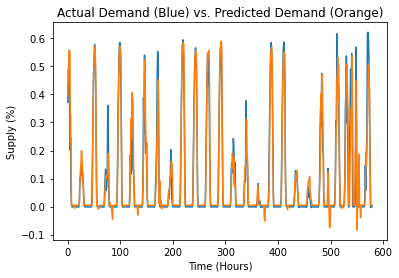

In [71]:
# Make prediction using holdout set
yhat = model.predict(X_test)
print(yhat)
figure, axis = plt.subplots(1, 1)
axis.plot([i for i in range(len(y_test))], y_test)
axis.plot([i for i in range(len(yhat))], yhat)

plt.title('Actual Demand (Blue) vs. Predicted Demand (Orange)')
plt.xlabel('Time (Hours)')
plt.ylabel('Supply (%)')

plt.show()

In [68]:
#holdyDF = pd.DataFrame(holdout_y)
#holdyDF.head()

#print(holdout_y[:,-1])
rehat = np.reshape(yhat, (1, n_test))

difference = rehat - y_test
sq_difference = np.square(difference)
sum_sq = np.sum(sq_difference)
MSE = sum_sq/n_test
print(MSE)

0.003412166108144956


In [69]:
print(y_test[:200])

[ 3.71798043e-01  4.89834701e-01  4.89013831e-01  4.84988193e-01
  2.01473069e-01  3.25570674e-01  6.14978073e-02  8.42235466e-03
 -1.18070392e-03 -1.10199033e-03 -1.01203194e-03 -1.06825593e-03
 -1.13572473e-03 -1.23692792e-03 -1.16945913e-03 -1.21443832e-03
 -1.32688632e-03 -1.31564152e-03 -1.32688632e-03 -1.25941752e-03
 -1.11323513e-03 -1.48431351e-03  1.57764534e-02  1.01585517e-01
  9.07230406e-02  1.17609356e-01  1.48926122e-01  1.10648825e-01
  1.24671090e-01  1.02979872e-01  3.83222759e-02  4.22804453e-03
 -1.19194872e-03 -1.06825593e-03 -1.07950073e-03 -1.09074553e-03
 -1.13572473e-03 -1.18070392e-03 -1.19194872e-03 -1.19194872e-03
 -1.19194872e-03 -1.18070392e-03 -1.27066232e-03 -1.24817272e-03
 -1.14696953e-03 -1.50680310e-03  5.28168222e-02  1.93804116e-01
  3.32823569e-01  4.56066569e-01  5.30754526e-01  5.78106376e-01
  5.41347127e-01  4.38985719e-01  2.21533791e-01  3.49038570e-02
 -1.32688632e-03 -1.03452153e-03 -1.01203194e-03 -1.04576633e-03
 -1.09074553e-03 -1.18070

In [70]:
# Return predictions in a list
#return([current_prediction, future_prediction])